{('A', 'B'): Text(-0.2993626504323253, 0.6061777613880405, '2'),
 ('A', 'C'): Text(-0.09217629175378689, 0.1869861609848946, '3'),
 ('A', 'D'): Text(-0.7287967245102933, -0.05078054386965497, '4'),
 ('A', 'E'): Text(-0.3301119231579601, 0.3658221290095637, '5'),
 ('A', 'F'): Text(-0.4985621629609441, -0.07240322959216772, '6'),
 ('A', 'X'): Text(-0.7109008243497319, 0.19822320761914805, '8'),
 ('A', 'Y'): Text(-0.5927326230351333, 0.39610412061041633, '9'),
 ('A', 'Z'): Text(-0.477483038687898, 0.18438452419859425, '10'),
 ('B', 'C'): Text(0.6084610578138877, 0.34137454447704907, '5'),
 ('B', 'D'): Text(-0.028159374942618692, 0.10360783962249948, '6'),
 ('B', 'E'): Text(0.3705254264097145, 0.5202105125017181, '7'),
 ('B', 'F'): Text(0.20207518660673052, 0.08198515389998673, '8'),
 ('B', 'G'): Text(0.43076358845574847, 0.1470317647268651, '9'),
 ('B', 'X'): Text(-0.010263474782057358, 0.35261159111130247, '10'),
 ('B', 'Y'): Text(0.10790472653254125, 0.5504925041025708, '11'),
 ('B', 'Z

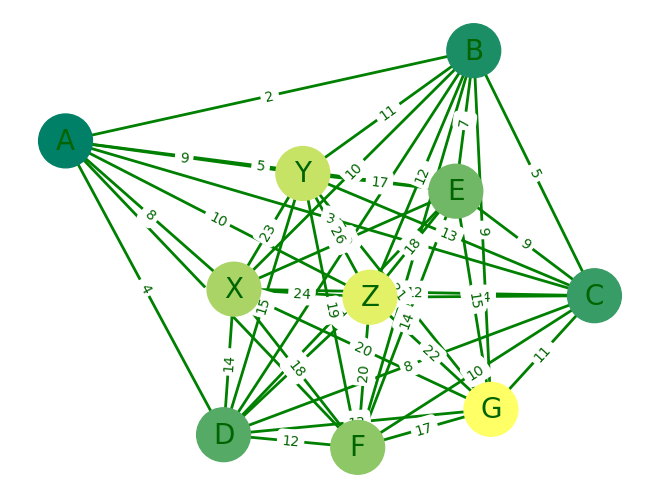

In [15]:
#p229278 
import numpy as np 
import pandas as pd 
import networkx as nx 
from matplotlib.cm import summer


G = nx.Graph()
df = pd.read_csv('/home/shafeenkhan/Documents/My-all-programs--/Semester-4/Aritificial Intelligence/LAB-05/sh_graph.csv')
G.add_weighted_edges_from(df.values)

# spring_layout is used to position the nodes 
pos = nx.spring_layout(G)


nx.draw(G, pos, with_labels=True, node_color=range(10), node_size=1500, cmap= summer, edge_color='green',width =2, linewidths=1, font_size=20, font_color='darkgreen')
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_color='darkgreen', font_size=10)



In [16]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                

In [17]:
def dfs(graph, start, goal):
    visited = set()

    def dfs_recursive(node, path):
        if node == goal:
            return path
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_path = dfs_recursive(neighbor, path + [neighbor])
                if new_path:
                    return new_path
        return None

    return dfs_recursive(start, [start])

In [18]:
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((heuristic[start], [start]))  # Initial state

    while not pri_queue.empty():
        heruistic_current, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))

    return []  # Goal not found


In [19]:

start_node = input("Enter the start node: ")
goal_node = input("Enter the goal node: ")
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}
choice = 0

while choice != 4:
    print("\n1. BFS")
    print("2. DFS")
    print("3. Best-First Search")
    print("4. Exit")
    choice = int(input("Enter your choice: "))

    if choice == 1:
        
        algo = bfs(G, start_node, goal_node)
        if algo:
            print("BFS Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by BFS: ", len(algo) - 1)
        else:
            print("No path found")
        
    elif choice == 2:
        algo = dfs(G, start_node, goal_node)
        if algo:
            print("DFS Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by DFS: ", len(algo) - 1)
        else:
            print("No path found")
    elif choice == 3:
        algo = best_first_search(G, start_node, goal_node, heuristic)
        if algo:
            print("Best-First Search Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by Best-First Search: ", len(algo) - 1)
        else:
            print("No path found")
    elif choice == 4:
        print("Exiting...")
    else:
        print("Invalid choice. Try again.")








1. BFS
2. DFS
3. Best-First Search
4. Exit
BFS Path from A to C : ['A', 'C']
Nodes Traced by BFS:  1

1. BFS
2. DFS
3. Best-First Search
4. Exit
BFS Path from A to C : ['A', 'C']
Nodes Traced by BFS:  1

1. BFS
2. DFS
3. Best-First Search
4. Exit
DFS Path from A to C : ['A', 'B', 'C']
Nodes Traced by DFS:  2

1. BFS
2. DFS
3. Best-First Search
4. Exit
DFS Path from A to C : ['A', 'B', 'C']
Nodes Traced by DFS:  2

1. BFS
2. DFS
3. Best-First Search
4. Exit
Best-First Search Path from A to C : ['A', 'C']
Nodes Traced by Best-First Search:  1

1. BFS
2. DFS
3. Best-First Search
4. Exit
Exiting...
